In [1]:
from pykat import finesse
import matplotlib.pyplot as plt
%matplotlib inline

                                              ..-
    PyKat 1.0.18          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



--------------------------------------------------------------
Running kat - Started at 2017-07-25 18:29:36.156569


 66% | ETA:  0:00:02 | Saving data                                             


Finished in 5.21026 seconds


100% | ETA:  0:00:00 | Saving data                                             

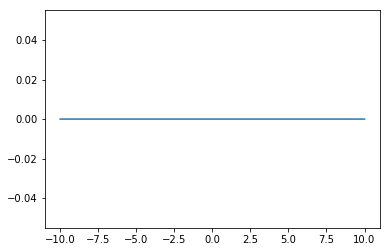

In [32]:
kat = finesse.kat()

kat.parseCommands("""
l i1 1 0 n1
s s0 1 n1 n2

mod mod 12M 0 1 pm n2 nn
s s1 1 nn n3

m1 m1 0.000002 0 0 n3 n4
s s_cav 0.1 n4 n5
m1 m2 0.000002 0 0 n5 n6
attr m2 Rc 0.1

cav cavity1 m1 n4 m2 n5
maxtem 3
pd pow n5
pd1 errsig 12M 0 n3

xaxis m2 phi lin -10 10 20000
""")

out = kat.run()

# plt.plot(out.x, out["pow"])
plt.plot(out.x,out["errsig"])

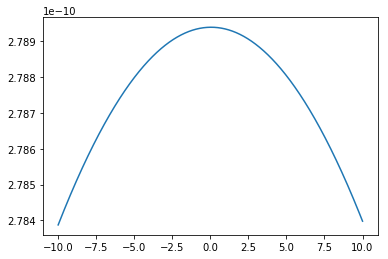

In [33]:
plt.plot(out.x,out["pow"])

In [23]:
200./10**6

0.0002

In [ ]:
kat2 = kat.deepcopy()
kat2.m1.R = 0.8
kat2.m1.T = 0.2
kat2.m1.L = 0.0
kat2.parseCommands("pd Pt n6")
out2 = kat2.run()
plt.plot(out2.x, out2["Pt"])

In [ ]:
plt.plot(out.x, out["pow"])
plt.plot(out2.x,out2["pow"])

In [ ]:
plt.plot(out2.x,out2.y)

In [ ]:
kat.parseCommands("""
attr m1 xbeta 0.00001
ad A01 0 1 0 n4
ad A10 1 0 0 n4
ad A00 0 0 0 n4
yaxis re:im
""")
kat.maxtem = 4
out = kat.run()
plt.plot(out.x,abs(out["A01"])**2, label='01')
plt.plot(out.x,abs(out["A10"])**2, label='10')
plt.plot(out.x,abs(out["A00"])**2, label="00")
plt.legend()